# Regress Thermodynamic Data using PropFit  

Author: Jordyn Robare  
email: jordynrobare@gmail.com  

This notebook is made to demonstrate how to regress thermodynamic data for organic molecules in order to estimate group contribution values. 
Group contribution values are then made into files that can be used in the AqOrg package (Boyer et al., 2025) to estimate properties of whole molecules. 

Add example of modifying the thermodynamic database

### 1. Import necessary packages

In [1]:
from AqOrg import Estimate
import pandas as pd
import propfit
from pyCHNOSZ import *

### 2. Initialize the package using the Propfit class  
Add the name of a CSV as the thermodynamic database from which group contribution values will be regressed. We provide a CSV named 'default database.csv' that 
may be sufficient. However, it can be modified intro a custom database built by the user.   
  
Supply the name of the thermodynamic properties that need to be regressed. 

In [2]:
pf = propfit.PropFit()

### 3. Combine molecular properties with group data using the dataprep() function  
This step will take the input file with molecular thermodynamic properties and combine it with the group matching for each molecule.  
Default arguments
- average = True (average values when their is more than one measurement for a molecular property. 
- order = 2 (1st or 2nd order method)
- output_name = None (if no name is supplied, the file will be called 'properties and groups.csv'

This cell will take a minute.

In [3]:
pf.dataprep()

properties and groups.csv created


##### 3.1. Visualize the file you just generated

In [4]:
df = pd.read_csv('properties and groups.csv')
df.head()

,compound,Gh,Hh,Cph,V,Hig,Sig,Cpig,C-[CX4H2R1!r3]-C,C-[CX4H1R1!r3](-C)-C,...,C-[CX4H0R1!r3](-O)(-C)-O,O-[CX4H1R1r3](-C)-C,C-[CX4H1R1r3](-C)-C,C-[CX4H0R1r3](-C)(-C)-C,[CX4H2R1r3],C-[CX4H1R3r3](-C)-C,C-[CX4H0R3r3](-C)(-C)-C,C-[CX4H0R2r3](-[CX4H1R2r3])(-C)-C,C-[CX4H2R1!r3][cX3H0R2!r3][cH1],formula
0,Propane,16.090000,-22.926667,346.666667,70.90,-104.70,270.31,76.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C3H8
1,n-Butane,16.580000,-25.925000,386.500000,75.55,-125.60,309.91,98.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C4H10
2,n-Pentane,17.386000,-27.720000,452.000000,NaN,-146.75,349.56,120.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C5H12
3,n-Hexane,16.962727,-31.470000,492.700000,NaN,-166.97,388.85,142.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C6H14
4,n-Heptane,18.354375,-36.186667,540.000000,NaN,-187.54,428.10,165.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C7H16


### 4. Regress thermodynamic properties of groups  
Using the file you just generated, regress the thermodynamic properties of groups in the dataframe using the group_property_estimator() function. 
- filename = Name of the file containing compounds, properties, and group matching data.
- props = ['Gh','Hh','Cph','V','Hig','Sig','Cpig'] (list of group properties that need to be regressed - these need to match the column names in the input file)
- ignore = list of properties you do not wish to regress.

In [5]:
pf.group_property_estimator('properties and groups.csv', props = ['Gh','Hh','Cph','V','Hig','Sig','Cpig'])

### 5. Check for overfitting of the model  
Compare how well the model estimates properties of the training set versus the test set. The default training size is 80% while the default test size is 20%, so it is typical for the errors in the test set to be higher. However, is the gap between the training and test set errors increases, be wary that the model is overfitting to the training set. This cell will take the longest to run, but should be run once to determine if it is reasonble to use the group data for new molecular estimations. It will produce a bar plot of training and test set errors for each property. A dataframe with the values will also be produced, named 'stats df.csv'.  
- repeats = how many iterations to do the semi-random train-test-split. Default: 100
- test_size = what fraction of the entire database to make the test set. Default: 0.2
- filename = name of the CSV with properties and groups from which to perform the train-test-split
- output_name = name of output file
- show = True or False. Show plot of errors?

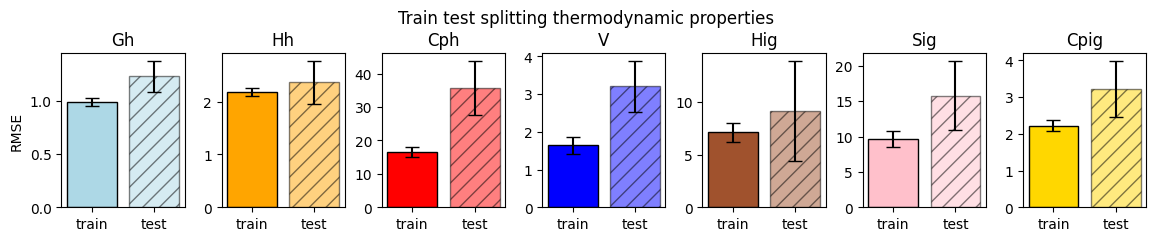

In [6]:
pf.tts()

### 6. Generate the group properties datasheet  
Once you are satisfied with the data, use the generate() function to make a dataframe which contains thermodynamic properties of each group. These dataframes can be used as input to the Estimate() function of the sister package, AqOrg.

- filename = 'properties and groups regressed'
- order: order of approximation
- hyd_props = ['Gh','Hh','Cph','V'] (list of hydration properties you want to regress)
- gas_props = ['Hig','Sig','Cpig'] (list of ideal gas properties you want to regress)

In [7]:
pf.generate()

### 7. Estimate properties of new molecules  
Provide the name of the dataframes you just generated to the Estimate function of AqOrg to estimate properties of new molecules. Be careful not to re-estimate properties for molecules that have already been experimentally determined. 

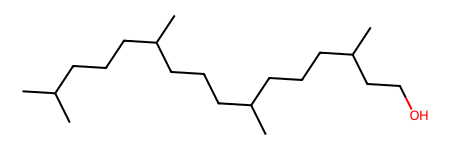

In [8]:
gas_props = Estimate(name="phytanol", state="gas", ig_method="custom", group_data="gas props.csv")

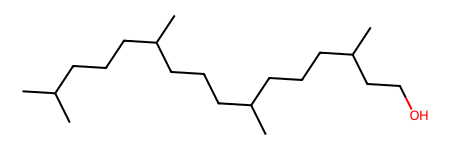

In [9]:
aq_props = Estimate(name="phytanol", state="aq", group_data="hyd props.csv",
                    Gig = gas_props.Gig,
                    Hig = gas_props.Hig,
                    Sig = gas_props.Sig, 
                    Cpig = gas_props.Cpig
                   )

Add your new data into pyCHNOSZ (Boyer, 2024), a python wrapper for thermodynamic modeling R software CHNOSZ (Dick, 2019), using 'add_OBIGT(aq_props.OBIGT)'.

In [10]:
add_OBIGT(aq_props.OBIGT)

mod.OBIGT: added phytanol(aq) with energy units of J



[3446]

View the molecule with 'info(info('molecule'))'.

In [11]:
info(info('phytanol'))

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1,a2,a3,a4,c1,c2,omega,Z
3446,phytanol,C20H42O,C20H42O,aq,AqOrg,GrpAdd,02/10/2025 15:41:43,J,-29986.0,-743799.8,...,1760.5617,337.46,27.612782,22019.987164,431.864391,-1.559632e+06,1706.196315,221980.6,-100476.689717,0.0


### References

Boyer, G., Robare, J., & Shock, E. (2025). AqOrg : Python package for estimating thermodynamic properties of aqueous organic molecules (v0.2.1). Zenodo. https://doi.org/10.5281/zenodo.14963369  
Boyer, G. (2024). pyCHNOSZ: Python wrapper for the thermodynamic package CHNOSZ (v0.8.15). Zenodo. https://doi.org/10.5281/zenodo.11406142  
Dick, J.M. (2019). CHNOSZ: Thermodynamic calculations and diagrams for geochemistry. Frontiers in Earth Science, 7, p.180. https://doi.org/10.3389/feart.2019.00180